# **7. 인공신경망 기초**

---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 7.1 뇌의 동작을 흉내내자 - 연결주의자의 목표

### 7.2 학습할 수 있는 신경 모델 - 퍼셉트론의 등장

### LAB 7-1: AND / OR 연산을 수행하는 퍼셉트론

In [ ]:
import numpy as np

W, b = np.array([0.5, 0.5]), -0.7

In [ ]:
def activation(s):           # 활성화 함수: 입력값이 0보다 크면 1, 아니면 -1
    if s > 0:    return 1
    else:        return -1

def perceptron_output(x):    # 퍼셉트론 출력 함수
    return activation(W.dot(x) + b)

In [ ]:
print('--- 퍼셉트론으로 구현한 AND 게이트 ---')
for xs in [[-1, -1], [-1, 1], [1, -1], [1, 1]]:
    y = perceptron_output(xs)
    print(xs, ': ', y)

--- 퍼셉트론으로 구현한 AND 게이트 ---
[-1, -1] :  -1
[-1, 1] :  -1
[1, -1] :  -1
[1, 1] :  1


In [ ]:
W, b = np.array([0.7, 0.7]), .5

In [ ]:
print('--- 퍼셉트론으로 구현한 OR 게이트 ---')
for xs in [[-1, -1], [-1, 1], [1, -1], [1, 1]]:
    y = perceptron_output(xs)
    print(xs, ': ', y)

--- 퍼셉트론으로 구현한 OR 게이트 ---
[-1, -1] :  -1
[-1, 1] :  1
[1, -1] :  1
[1, 1] :  1


### LAB 7-2: 논리합을 수행하는 퍼셉트론 만들기

In [ ]:
import numpy as np

# 초기 가중치(W)와 편향(b)을 0으로 설정
W = np.array([0.0, 0.0])
b = 0.0

# 학습률(learning rate)
learning_rate = 0.01

In [ ]:
# 활성화 함수: 입력값이 0보다 크면 1, 작으면 -1, 0이면 0을 반환
def activation(s):
    if s > 0:    return 1
    else:        return -1

In [ ]:
# 퍼셉트론 출력 함수
def perceptron_output(x):
    return activation(W.dot(x) + b)

In [ ]:
# 학습 함수: 입력(x0, x1)과 목표값(target)을 이용해 가중치를 갱신
def train(x0, x1, target):
    global W, b

    X = np.array([x0, x1])
    y = perceptron_output(X)

    # 예측이 맞으면 가중치 수정 없이 종료
    if target == y:
        return False  # False → 가중치가 변하지 않았음을 의미

    # 예측이 틀리면 가중치와 편향 수정
    W = W + learning_rate * (target - y) * X
    b = b + learning_rate * (target - y)
    return True  # True → 가중치가 변경되었음을 의미

In [ ]:
# 여러 입력값에 대해 퍼셉트론의 예측 결과를 반환
def predict(inputs):
    return [perceptron_output(x) for x in inputs]

In [ ]:
# ---------------------- 학습 루프 ----------------------
def fit(X_list, target_list) :
    print("=== Perceptron Learning Start ===")

    for epoch in range(100):
        adjusted = 0  # 이번 학습 주기 동안 가중치가 변경된 횟수

        # 학습 데이터 (AND, OR, 혹은 사용자 정의 가능)
        for i in range(len(X_list)):
            adjusted += train(X_list[i][0], X_list[i][1], target_list[i])


        print(f"--- Epoch {epoch} completed ---\n")

        # 가중치가 한 번도 변하지 않았다면 학습 종료
        if adjusted == 0:
            print("학습이 수렴했습니다. (No weight changes)")
            break


In [ ]:
X_data = [ [-1, -1], [-1, 1], [1, -1], [1, 1] ]
t_data = [ -1, 1, 1, 1 ]

fit(X_data, t_data)

print("최종 가중치:", W, "편향:", b)

=== Perceptron Learning Start ===
--- Epoch 0 completed ---

--- Epoch 1 completed ---

--- Epoch 2 completed ---

학습이 수렴했습니다. (No weight changes)
최종 가중치: [0.02 0.02] 편향: 0.02


In [ ]:
X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1 -1
-1  1  1
 1 -1  1
 1  1  1


### LAB 7-3 : 다양한 논리 연산이 가능하게 퍼셉트론 훈련하기

In [ ]:
X_data = [ [-1, -1], [-1, 1], [1, -1], [1, 1] ]
t_data = [ -1, -1, -1, 1 ]

fit(X_data, t_data)

print("최종 가중치:", W, "편향:", b)

=== Perceptron Learning Start ===
--- Epoch 0 completed ---

--- Epoch 1 completed ---

학습이 수렴했습니다. (No weight changes)
최종 가중치: [0.02 0.02] 편향: -0.02


In [ ]:
X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1 -1
-1  1 -1
 1 -1 -1
 1  1  1


### NAND 구현

In [ ]:
X_data = [ [-1, -1], [-1, 1], [1, -1], [1, 1] ]
t_data = [ 1, 1, 1, -1 ]

fit(X_data, t_data)

print("최종 가중치:", W, "편향:", b)

=== Perceptron Learning Start ===
--- Epoch 0 completed ---

--- Epoch 1 completed ---

학습이 수렴했습니다. (No weight changes)
최종 가중치: [-0.02 -0.02] 편향: 0.02


In [ ]:
X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1  1
-1  1  1
 1 -1  1
 1  1 -1


### 도전문제 7.1 XOR의 진리표를 이용하여 퍼셉트론을 학습시켜 보자

In [ ]:
X_data = [ [-1, -1], [-1, 1], [1, -1], [1, 1] ]
t_data = [ -1, 1, 1, -1 ]

fit(X_data, t_data)

print("최종 가중치:", W, "편향:", b)

=== Perceptron Learning Start ===
--- Epoch 0 completed ---

--- Epoch 1 completed ---

--- Epoch 2 completed ---

--- Epoch 3 completed ---

--- Epoch 4 completed ---

--- Epoch 5 completed ---

--- Epoch 6 completed ---

--- Epoch 7 completed ---

--- Epoch 8 completed ---

--- Epoch 9 completed ---

--- Epoch 10 completed ---

--- Epoch 11 completed ---

--- Epoch 12 completed ---

--- Epoch 13 completed ---

--- Epoch 14 completed ---

--- Epoch 15 completed ---

--- Epoch 16 completed ---

--- Epoch 17 completed ---

--- Epoch 18 completed ---

--- Epoch 19 completed ---

--- Epoch 20 completed ---

--- Epoch 21 completed ---

--- Epoch 22 completed ---

--- Epoch 23 completed ---

--- Epoch 24 completed ---

--- Epoch 25 completed ---

--- Epoch 26 completed ---

--- Epoch 27 completed ---

--- Epoch 28 completed ---

--- Epoch 29 completed ---

--- Epoch 30 completed ---

--- Epoch 31 completed ---

--- Epoch 32 completed ---

--- Epoch 33 completed ---

--- Epoch 34 completed -

In [ ]:
X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1  1
-1  1  1
 1 -1  1
 1  1 -1


### 7.4 퍼셉트론, 연결주의가 누린 첫 영예와 긴 좌절

### 7.5 퍼셉트론이 XOR 문제를 풀 수 있게 만드는 방법

### LAB 7-4 입력 다항화로 XOR 해결해 보기

In [ ]:
import numpy as np

# 입력 x1, x2 => x1, x2, x1x2로 변경한 다항화에 대응하고
# 편향을 포함한 가중치를 위해 4개의 원소를 가중치로 준비
W = np.array([0, 0, 0, 0])

# 학습률(learning rate)
learning_rate = 0.01

In [ ]:
def activation(s):
    if s > 0:    return 1
    else:        return -1

def perceptron_poly(polyX):
    return activation(W.dot(polyX) + b)

In [ ]:
# 학습 함수: 입력(x0, x1)과 목표값(target)을 이용해 가중치를 갱신
def train(x0, x1, target):
    global W

    polyX = np.array([x0, x1, x0*x1, 1])
    y = perceptron_poly(polyX)

    # 예측이 맞으면 가중치 수정 없이 종료
    if target == y:
        return False  # False → 가중치가 변하지 않았음을 의미

    # 예측이 틀리면 가중치와 편향 수정
    W = W + learning_rate * (target - y) * polyX
    return True  # True → 가중치가 변경되었음을 의미

In [ ]:
# ---------------------- 학습 루프 ----------------------
def fit(X_list, target_list) :
    print("=== Perceptron Learning Start ===")

    for epoch in range(100):
        adjusted = 0  # 이번 학습 주기 동안 가중치가 변경된 횟수

        # 학습 데이터 (AND, OR, 혹은 사용자 정의 가능)
        for i in range(len(X_list)):
            adjusted += train(X_list[i][0], X_list[i][1], target_list[i])


        print(f"--- Epoch {epoch} completed ---\n")

        # 가중치가 한 번도 변하지 않았다면 학습 종료
        if adjusted == 0:
            print("학습이 수렴했습니다. (No weight changes)")
            break

In [ ]:
X_data = [ [-1, -1], [-1, 1], [1, -1], [1, 1] ]
t_data = [ -1, 1, 1, -1 ]

fit(X_data, t_data)

print("최종 가중치:", W, "편향:", b)

=== Perceptron Learning Start ===
--- Epoch 0 completed ---

--- Epoch 1 completed ---

학습이 수렴했습니다. (No weight changes)
최종 가중치: [ 0.    0.   -0.04 -0.04] 편향: 0.02


In [ ]:
def predict(inputs):
    outputs = []
    for x in inputs:
        polyX = np.array([x[0], x[1], x[0]*x[1], 1])
        outputs.append (perceptron_poly(polyX))
    return outputs

In [ ]:
X = [[-1, -1], [-1, 1], [1, -1], [1,1]]
yhat = predict(X)
print('x0 x1  y')
for i in range(len(X)):
    print('{0:2d} {1:2d} {2:2d}'.format(X[i][0], X[i][1], yhat[i]))

x0 x1  y
-1 -1 -1
-1  1  1
 1 -1  1
 1  1 -1


### 7.6 퍼셉트론의 학습규칙 일반화 - 단층 퍼셉트론에 경사 하강법 적용

### 7.7 다층 퍼셉트론의 학습 - 오차를 아래로 전파하자

### 7.8 계층 단위 신호 전파를 수식화하자

### LAB 7-5: XOR 연산이 가능한 다층 퍼셉트론 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_dim = 2
h_dim = 3
y_dim = 2

U = np.random.rand(x_dim + 1, h_dim)   # 연결강도
W = np.random.rand(h_dim + 1, y_dim)   # 연결강도
learning_rate = 1.5       # 학습률

In [ ]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

def derivative_sigmoid(v):
    s = sigmoid(v)
    return s*(1-s)


In [ ]:
# 입력을 위한 변수
input = np.zeros(2)

# 순전파시 계산될 값들
h_sum, h_out, h_deriv = np.zeros(3), np.zeros(3), np.zeros(3)
# 역전파시 계산될 값들
h_error, h_delta = np.zeros(3), np.zeros(3)


# 순전파시 계산될 값들
y_sum, y_out, y_deriv = np.zeros(2), np.zeros(2), np.zeros(2)
# 역전파시 계산될 값들
y_error, y_delta = np.zeros(2), np.zeros(2)

In [ ]:
def forward_xh(x):
    global input, h_sum, h_out, h_deriv
    input = np.array(x)
    input_1 = np.append(x, 1)              # 편향 처리를 위해
    h_sum = U.T.dot(input_1)               # 편향을 포함한 전파
    h_out = sigmoid(h_sum)                 #
    h_deriv = derivative_sigmoid(h_sum)    #

In [ ]:
def forward_hy():
    global y_sum, y_out, y_deriv
    h_out_1 = np.append(h_out, 1)           # 편향 처리를 위해
    y_sum = W.T.dot(h_out_1)                # 편향을 포함한 전파
    y_out = sigmoid(y_sum)                  #
    y_deriv = derivative_sigmoid(y_sum)     #

In [ ]:
def compute_error(target):
    return y_out - target                   #

In [ ]:
def backward_y(error):
    global y_error, y_delta, W
    y_error = error                                    #  error
    y_delta = y_deriv * y_error                        #
    ## 연결강도 W 수정
    h_out_1 = np.append(h_out, 1)                      #
    dW = - learning_rate * np.outer(h_out_1, y_delta)    #
    W = W + dW                                         #

In [ ]:
def backward_h():
   global h_error, h_delta, U

   h_error = W.dot(y_delta)[:h_dim]                     #
   h_delta = h_deriv * h_error                          #
   ## 연결강도 U 수정
   input_1 = np.append(input, 1)
   dU = - learning_rate * np.outer(input_1, h_delta)      #
   U = U + dU                                           #

In [ ]:
def train(x, target):
    forward_xh(x)
    forward_hy()
    e = compute_error(target)
    backward_y(e)
    backward_h()
    return e**2

In [ ]:
loss = []

for i in range(1000):
    e_accum=0
    true = np.array([1,0])
    false = np.array([0,1])
    e_accum += train(np.array([0,0]), false)    # 훈련 데이터 1
    e_accum += train(np.array([0,1]), true)     # 훈련 데이터 2
    e_accum += train(np.array([1,1]), false)    # 훈련 데이터 4
    e_accum += train(np.array([1,0]), true)     # 훈련 데이터 3
    loss.append(e_accum)

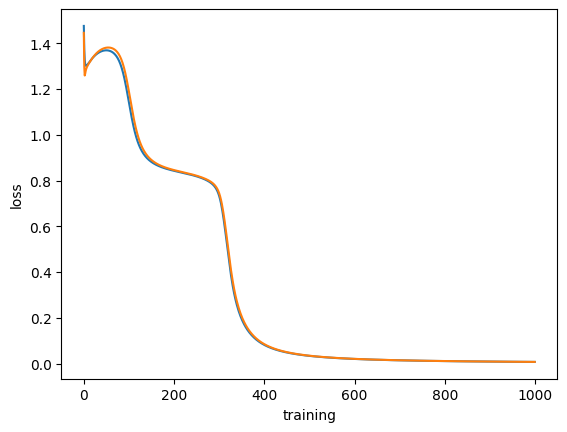

In [ ]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('training')
plt.show()

In [ ]:
def test(X):
    y_hat = []
    for x in X:
        forward_xh(x)
        forward_hy()
        y_hat.append(y_out)
    return y_hat

In [ ]:
test(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))

[array([0.01551994, 0.98459829]),
 array([0.95482468, 0.04537961]),
 array([0.95444742, 0.04572997]),
 array([0.05645562, 0.94328142])]

### LAB 7-6다층 퍼셉트론으로 비선형 회귀 구현하기

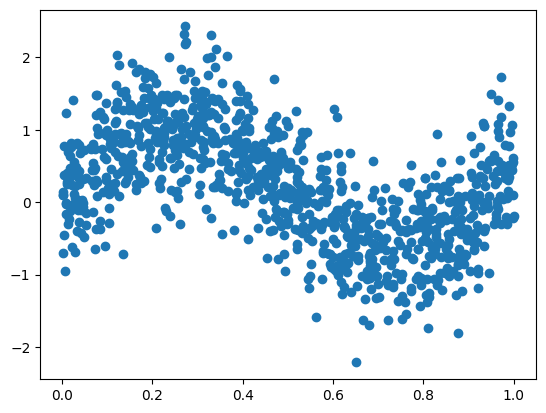

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
plt.scatter(df['x'], df['y'])

In [ ]:
nx, nh1, nh2, ny = 1, 6, 4, 1
U = np.random.randn(nx + 1 , nh1)
V = np.random.randn(nh1 + 1, nh2)
W = np.random.randn(nh2 + 1, ny)
learning_rate = 0.1

In [ ]:
def sigmoid(v):
    return 1 / (1+np.exp(-v))

In [ ]:
input = np.zeros(nx)

h1_out, h1_deriv = np.zeros(nh1), np.zeros(nh1) # 순전파시 계산 - 은닉계층 1
h1_delta = np.zeros(nh1)                        # 역전파시 계산

h2_out, h2_deriv = np.zeros(nh2), np.zeros(nh2) # 순전파시 계산 - 은닉계층 2
h2_delta = np.zeros(nh2)                        # 역전파시 계산

y_out, y_deriv = np.zeros(ny), np.zeros(ny)     # 순전파시 계산 - 출력계층
y_delta = np.zeros(ny)                          # 역전파시 계산

In [ ]:
def forward(x):
    global input, h1_out, h1_deriv, h2_out, h2_deriv, y_out, y_deriv
    input = np.array(x)
    input_1 = np.append(x, 1)                    # 편향 처리
    h1_out = sigmoid ( U.T.dot(input_1) )        # 은닉계층 1로 전파
    h1_deriv = h1_out * (1 - h1_out)             # 은닉계층 1의 미분

    h1_out_1 = np.append(h1_out, 1)              # 편향 처리
    h2_out = sigmoid ( V.T.dot(h1_out_1) )       # 은닉계층 2로 전파
    h2_deriv = h2_out * (1 - h2_out)             # 은닉계층 2의 미분

    h2_out_1 = np.append(h2_out, 1)              # 편향 처리
    y_out = sigmoid( W.T.dot(h2_out_1) )         # 출력계층으로 전파
    y_deriv = y_out * (1 - y_out)                # 출력계층의 미분

In [ ]:
def compute_error(target):
    return y_out - target

In [ ]:
def backward(error):
    global y_delta, W, h2_delta, V, h1_delta, U

    y_delta = y_deriv * error                           # 출력 계층의 델타
    h2_out_1 = np.append(h2_out, 1)                     # 편향 처리
    dW = - learning_rate * np.outer(h2_out_1, y_delta)  # W의 수정
    W = W + dW


    h2_delta = h2_deriv * W.dot(y_delta)[:nh2]          # 은닉 계층 2의 델타
    h1_out_1 = np.append(h1_out, 1)                     # 편향 처리
    dV = - learning_rate * np.outer(h1_out_1, h2_delta) # V의 수정
    V = V + dV


    h1_delta = h1_deriv * V.dot(h2_delta)[:nh1]         # 은닉 계층 1의 델타
    input_1 = np.append(input, 1)                       # 편향 처리
    dU = - learning_rate * np.outer(input_1, h1_delta)  # U의 수정
    U = U + dU


In [ ]:
def train(x, target):
    forward(x)
    e = compute_error(target)
    backward(e)
    return e**2

In [ ]:
loss = []
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
for i in range(300):
    e_accum = 0
    for x, y in zip(X, y_label):
        e_accum += train(x, y)
    loss.append(e_accum)

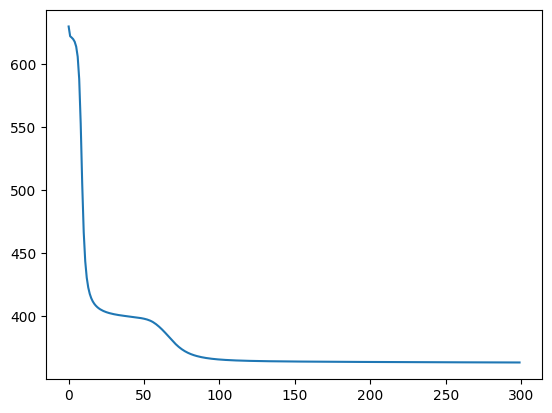

In [ ]:
err_log = np.array(loss).flatten()
plt.plot(err_log)
plt.show()

In [ ]:
def predict(X):
    y_hat = []
    for x in X:
        forward(x)
        y_hat.append(y_out)
    return y_hat

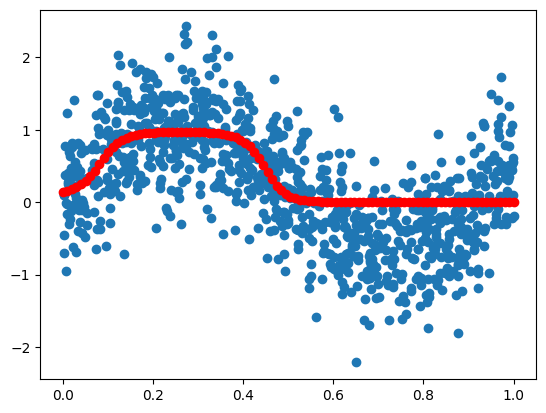

In [ ]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

### 7.9 인공 신경망을 설계하고 훈련할 수 있는 도구: 텐서플로우

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 텐서플로우와 케라스를 사용할 수 있도록 준비
import tensorflow as tf    # 텐서플로우는 주로 tf라는 별명을 사용한다
from tensorflow import keras

In [ ]:
model = keras.models.Sequential( [
    keras.layers.Dense(6, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(1, activation= 'sigmoid'),
])

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=5.0)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy().reshape(-1,1)
y_label = df['y'].to_numpy()

In [ ]:
model.fit(X, y_label, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6452
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6117
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6309
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5496
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4897
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4332
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4078
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4032
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4085
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4071
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4254
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3720
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4199
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4001
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3974
Epo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


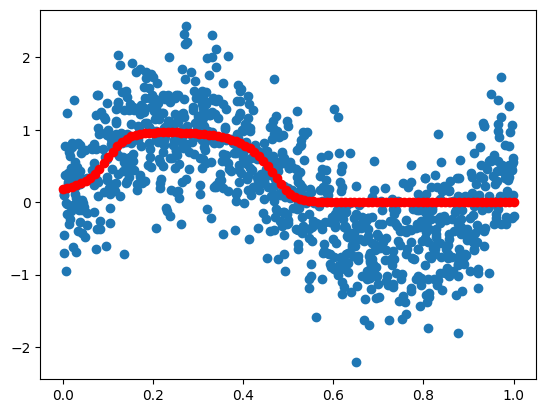

In [ ]:
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')